### **Quick introduction to jupyter notebooks**
* Each cell in this notebook contains either code or text.
* You can run a cell by pressing Ctrl-Enter, or run and advance to the next cell with Shift-Enter.
* Code cells will print their output, including images, below the cell. Running it again deletes the previous output, so be careful if you want to save some results.
* You don't have to rerun all cells to test changes, just rerun the cell you have made changes to. Some exceptions might apply, for example if you overwrite variables from previous cells, but in general this will work.
* If all else fails, use the "Kernel" menu and select "Restart Kernel and Clear All Output". You can also use this menu to run all cells.
* A useful debug tool is the console. You can right-click anywhere in the notebook and select "New console for notebook". This opens a python console which shares the environment with the notebook, which let's you easily print variables or test commands.

### **Setup**

In [1]:
import os
import tensorflow as tf

# If there are multiple GPUs and we only want to use one/some, set the number in the visible device list.
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

2024-03-16 14:22:28.445064: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-03-16 14:22:48.334009: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-03-16 14:22:48.558907: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-03-16 14:22:49.019680: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2024-03-16 14:22:49.019722: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-03-16 14:22:49.674268: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-03-16

### **1. Loading the dataset**
This assignment will focus on the CIFAR10 dataset. This is a collection of small images in 10 classes such as cars, cats, birds, etc. You can find more information here: https://www.cs.toronto.edu/~kriz/cifar.html. We start by loading and examining the data.

In [4]:
import numpy as np
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


#### **<span style="color:red">Question 1:</span>**
The shape of X_train and X_test has 4 values. What do each of these represent?

#### **<span style="color:green">Answer:</span>**
The first number is the number of images, the second and third numbers are the dimensions of the images (pixels), and the third number indicates that there are three color levels (probably rgb).

##### **Plotting some images**
This plots a random selection of images from each class. Rerun the cell to see a different selection.

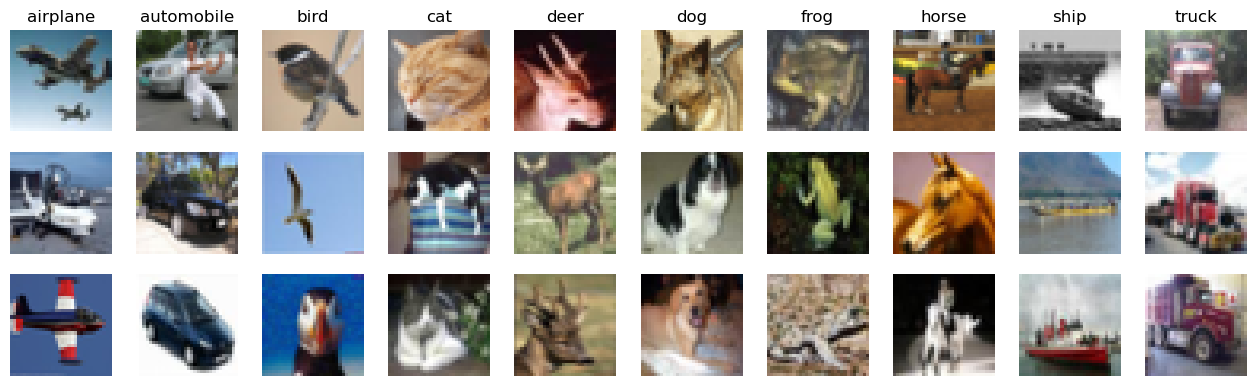

In [3]:
from Custom import PlotRandomFromEachClass

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
PlotRandomFromEachClass(X_train, y_train, 3, labels=cifar_labels)

##### **Preparing the dataset**
Just like the MNIST dataset we normalize the images to [0,1] and transform the class indices to one-hot encoded vectors.

In [5]:
from tensorflow.keras.utils import to_categorical

# Transform label indices to one-hot encoded vectors
y_train_c = to_categorical(y_train, num_classes=10)
y_test_c  = to_categorical(y_test , num_classes=10)

# Normalization of pixel values (to [0-1] range)
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32')  / 255

### **2. Fully connected classifier**
We will start by creating a fully connected classifier using the ```Dense``` layer. We give you the first layer that flattens the image features to a single vector. Add the remaining layers to the network.

Consider what the size of the output must be and what activation function you should use in the output layer.

In [6]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten

x_in = Input(shape=X_train.shape[1:])
x = Flatten()(x_in)

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

x = Dense(128, activation = "relu")(x)
x = Dense(64, activation = "relu")(x)
x = Dense(32, activation = "relu")(x)
x = Dense(16, activation = "relu")(x)

x = Dense(10, activation = "softmax")(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

# Now we build the model using Stochastic Gradient Descent with Nesterov momentum. We use accuracy as the metric.
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary(100)

2024-03-16 14:23:38.862761: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-16 14:23:38.863113: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-03-16 14:23:38.864005: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2024-03-16 14:23:38.864041: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-03-16 14:23:38.864072: I tensorflow/stream_executor/platform/default/dso_loa

Model: "model"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_1 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
flatten (Flatten)                            (None, 3072)                            0              
____________________________________________________________________________________________________
dense (Dense)                                (None, 128)                             393344         
____________________________________________________________________________________________________
dense_1 (Dense)                              (None, 64)                              8256           
____________________________________________________________________________

##### **Training the model**
In order to show the differences between models in the first parts of the assignment, we will restrict the training to the following command using 15 epochs, batch size 32, and 20% validation data. From section 5 and forward you can change this as you please to increase the accuracy, but for now stick with this command.

In [7]:
history = model.fit(X_train,y_train_c, epochs=15, batch_size=32, verbose=1, validation_split=0.2)

2024-03-16 14:23:58.073759: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-03-16 14:23:58.075772: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2596995000 Hz


Epoch 1/15


2024-03-16 14:23:59.686082: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


1250/1250 [==============================] - 10s 3ms/step - loss: 2.0445 - accuracy: 0.2297 - val_loss: 1.8412 - val_accuracy: 0.3158
Epoch 2/15
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8083 - accuracy: 0.3357 - val_loss: 1.7554 - val_accuracy: 0.3604
Epoch 3/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7288 - accuracy: 0.3695 - val_loss: 1.7004 - val_accuracy: 0.3830
Epoch 4/15
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6690 - accuracy: 0.4004 - val_loss: 1.6810 - val_accuracy: 0.3936
Epoch 5/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6204 - accuracy: 0.4175 - val_loss: 1.6523 - val_accuracy: 0.4080
Epoch 6/15
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5856 - accuracy: 0.4343 - val_loss: 1.6100 - val_accuracy: 0.4301
Epoch 7/15
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5539 - accuracy: 0.4390 - val_loss: 1.6121 - val_accuracy: 0.4224
Ep

##### **Evaluating the model**
We use ```model.evaluate``` to get the loss and metric scores on the test data. To plot the results we give you a custom function that does the work for you.

In [8]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.497
Test accuracy = 0.468


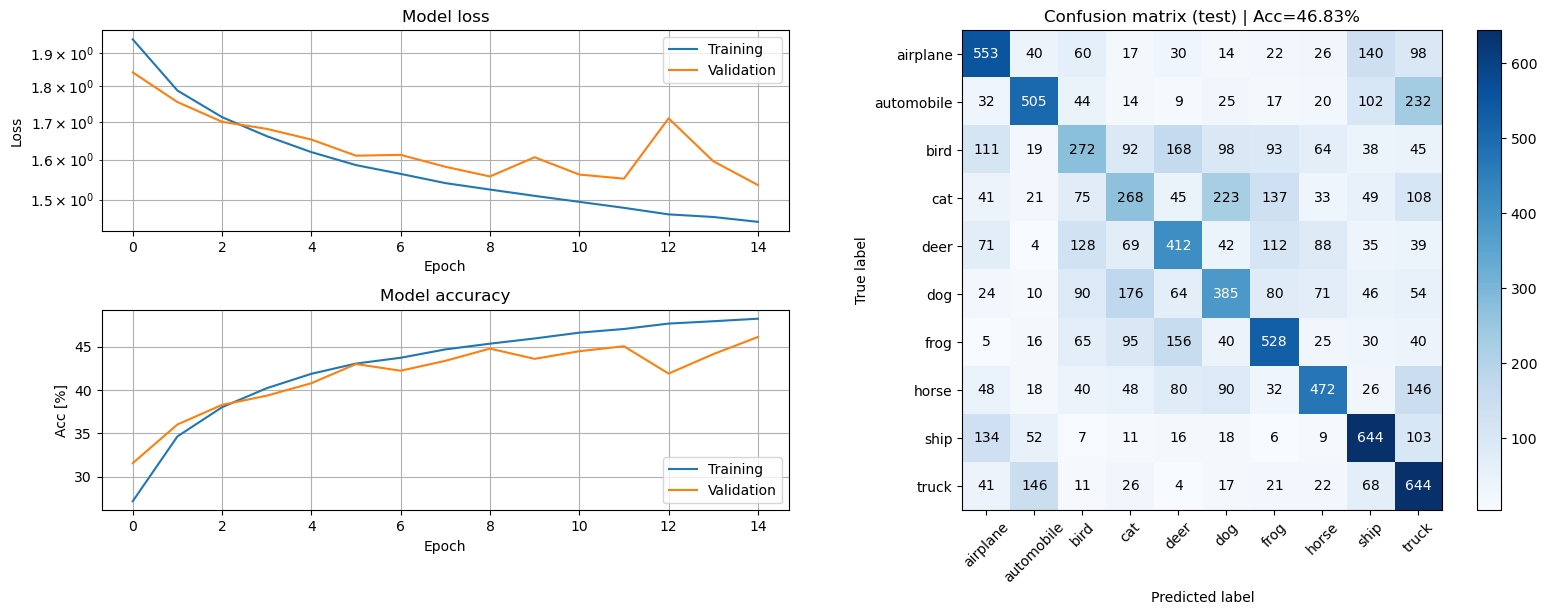

In [9]:
from Custom import PlotModelEval

# Custom function for evaluating the model and plotting training history
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 2:</span>**
Train a model that achieves above 45% accuracy on the test data. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**

For our model, we considered many architectures, but eventually converged to four hidden layers with 128, 64, 32 and 16 units respectively. For the output layer we used ten output nodes. For the hidden layers we used the relu activation in order to avoid the problem of the diminishing gradient. In the output layer we used the softmax activation in order to appropriately convert the output.

#### **<span style="color:red">Question 3:</span>**
Compare this model to the one you used for the MNIST dataset in the first assignment, in terms of size and test accuracy. Why do you think this dataset is much harder to classify than the MNIST handwritten digits?

#### **<span style="color:green">Answer:</span>**
This model is far more complex than the two-layer dense neural network from Lab 1. It is therefore quite reasonable that the initial accuracy is so much lower for this model. The MNIST dataset consists of 8x8 images that are quite simple, essentially consisting of various combinations of lines and curves, all in black and white. In the CIFAR dataset on the other hand, we have 32x32 pixel images, and three dimensions of colour, and the contents of the images are much richer, and possibilities for variance is much greater given that they reflect nature.

### **3. CNN classifier**
We will now move on to a network architecture that is more suited for this problem, the convolutional neural network. The new layers you will use are ```Conv2D``` and ```MaxPooling2D```, which you can find the documentation of here https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D and here https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D.

##### **Creating the CNN model**

A common way to build convolutional neural networks is to create blocks of layers of the form **[convolution - activation - pooling]**, and then stack several of these block to create the full convolution stack. This is often followed by a fully connected network to create the output classes. Use this recipe to build a CNN that acheives at least 62% accuracy on the test data.

*Side note. Although this is a common way to build CNNs, it is be no means the only or even best way. It is a good starting point, but later in part 5 you might want to explore other architectures to acheive even better performance.*

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
x = x_in

x = Conv2D(filters = 32, kernel_size = 3, activation = "relu", input_shape=x_in.shape[1:])(x)
x = MaxPooling2D(pool_size=2, padding="same")(x)

x = Conv2D(filters = 64, kernel_size = 3, activation = "relu", input_shape=x_in.shape[1:])(x)
x = MaxPooling2D(pool_size = 2, padding="same")(x)

x = Conv2D(filters = 128, kernel_size = 3, activation = "relu", input_shape=x_in.shape[1:])(x)
x = MaxPooling2D(pool_size = 2, padding="same")(x)

# Output layer
x = Flatten()(x)
x = Dense(256, activation="tanh")(x)
x = Dense(128, activation="tanh")(x)
x = Dense(10, activation = "softmax")(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_5"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_6 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_12 (Conv2D)                           (None, 30, 30, 32)                      896            
____________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D)              (None, 15, 15, 32)                      0              
____________________________________________________________________________________________________
conv2d_13 (Conv2D)                           (None, 13, 13, 64)                      18496          
__________________________________________________________________________

##### **Training the CNN**

In [19]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 13s 9ms/step - loss: 1.8123 - accuracy: 0.3300 - val_loss: 1.2683 - val_accuracy: 0.5502
Epoch 2/15
1250/1250 [==============================] - 10s 8ms/step - loss: 1.1267 - accuracy: 0.5960 - val_loss: 1.0115 - val_accuracy: 0.6488
Epoch 3/15
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9234 - accuracy: 0.6751 - val_loss: 0.9192 - val_accuracy: 0.6819
Epoch 4/15
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7921 - accuracy: 0.7208 - val_loss: 0.8816 - val_accuracy: 0.7016
Epoch 5/15
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6822 - accuracy: 0.7593 - val_loss: 0.8645 - val_accuracy: 0.7078
Epoch 6/15
1250/1250 [==============================] - 10s 8ms/step - loss: 0.5783 - accuracy: 0.7946 - val_loss: 0.8737 - val_accuracy: 0.7165
Epoch 7/15
1250/1250 [==============================] - 10s 8ms/step - loss: 0.4945 - accuracy: 0.8261 - val_loss: 0.8904 - val_ac

##### **Evaluating the CNN**

In [20]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.287
Test accuracy = 0.690


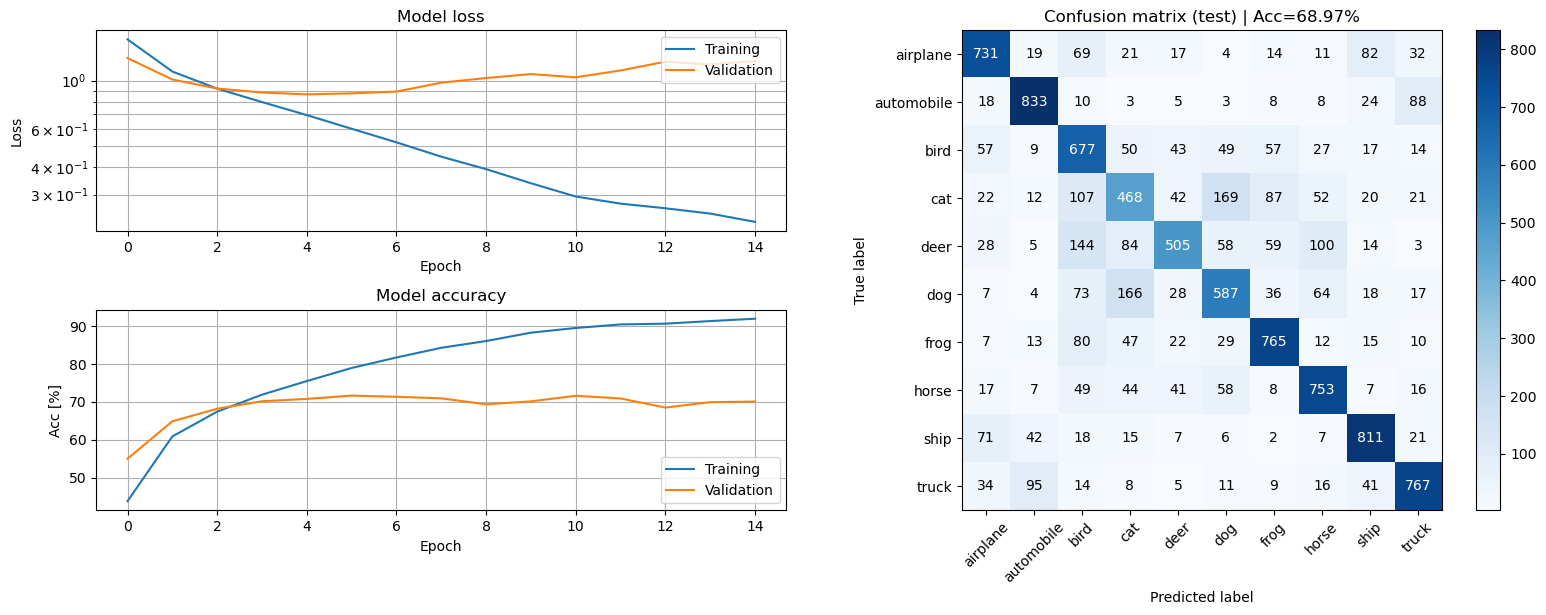

In [21]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 4:</span>**
Train a model that achieves at least 62% test accuracy. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**
We initially tried stacking blocks of convolutional and pooling layers in a for loop, but that proved not to work. We were advised to take the block out of the for loop and use an increasing number of filters further into the network. With this structure we achieved a promising test accuracy. Unfortunately the model seems to be overtraining, but we could not find a way to reduce this effect.

#### **<span style="color:red">Question 5:</span>**
Compare this model with the previous fully connected model. You should find that this one is much more efficient, i.e. achieves higher accuracy with fewer parameters. Explain in your own words how this is possible.

#### **<span style="color:green">Answer:</span>**
We did not manage to create a model with fewer parameters than the fully connected model, but we did achieve a much higher accuracy. Our fully connected model had about 404.000 parameters, whereas the CNN has about 422.000, but we went from a 46% accuracy to 69% accuracy. We hypothesize that this has to do with the fact that the CNN takes into account aspects of the images that are lost when flattening the data. One of these aspects is locality, because we are using a sliding kernel over the image the relations between pixels close to each other is not lost.

### **4. Regularization**

#### **4.1 Dropout**
You have probably seen that your CNN model overfits the training data. One way to prevent this is to add ```Dropout``` layers to the model, that randomly "drops" hidden nodes each training-iteration by setting their output to zero. Thus the model cannot rely on a small set of very good hidden features, but must instead learns to use different sets of hidden features each time. Dropout layers are usually added after the pooling layers in the convolution part of the model, or after activations in the fully connected part of the model.

*Side note. In the next assignment you will work with Ensemble models, a way to use the output from several individual models to achieve higher performance than each model can achieve on its own. One way to interpret Dropout is that each random selection of nodes is a separate model that is trained only on the current iteration. The final output is then the average of outputs from all the individual models. In other words, Dropout can be seen as a way to build ensembling directly into the network, without having to train several models explicitly.*

Extend your previous model with the Dropout layer and test the new performance.

In [28]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
x = x_in

x = Conv2D(filters = 32, kernel_size = 3, activation = "relu", input_shape=x_in.shape[1:])(x)
x = MaxPooling2D(pool_size=2, padding="same")(x)
x = Dropout(0.2)(x)

x = Conv2D(filters = 64, kernel_size = 3, activation = "relu", input_shape=x_in.shape[1:])(x)
x = MaxPooling2D(pool_size = 2, padding="same")(x)
x = Dropout(0.2)(x)

x = Conv2D(filters = 128, kernel_size = 3, activation = "relu", input_shape=x_in.shape[1:])(x)
x = MaxPooling2D(pool_size = 2, padding="same")(x)
x = Dropout(0.2)(x)

# Output layer
x = Flatten()(x)
x = Dense(256, activation="tanh")(x)
x = Dense(128, activation="tanh")(x)
x = Dense(10, activation = "softmax")(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_9"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_11 (InputLayer)                        [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_27 (Conv2D)                           (None, 30, 30, 32)                      896            
____________________________________________________________________________________________________
max_pooling2d_27 (MaxPooling2D)              (None, 15, 15, 32)                      0              
____________________________________________________________________________________________________
dropout_6 (Dropout)                          (None, 15, 15, 32)                      0              
__________________________________________________________________________

In [29]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 12s 9ms/step - loss: 1.8771 - accuracy: 0.3030 - val_loss: 1.3580 - val_accuracy: 0.5185
Epoch 2/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.3307 - accuracy: 0.5213 - val_loss: 1.1505 - val_accuracy: 0.5930
Epoch 3/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1547 - accuracy: 0.5873 - val_loss: 1.0287 - val_accuracy: 0.6310
Epoch 4/15
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0498 - accuracy: 0.6249 - val_loss: 0.9680 - val_accuracy: 0.6639
Epoch 5/15
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9727 - accuracy: 0.6567 - val_loss: 0.9154 - val_accuracy: 0.6799
Epoch 6/15
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9163 - accuracy: 0.6782 - val_loss: 0.8813 - val_accuracy: 0.6928
Epoch 7/15
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8693 - accuracy: 0.6926 - val_loss: 0.8386 - val_ac

In [30]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.789
Test accuracy = 0.737


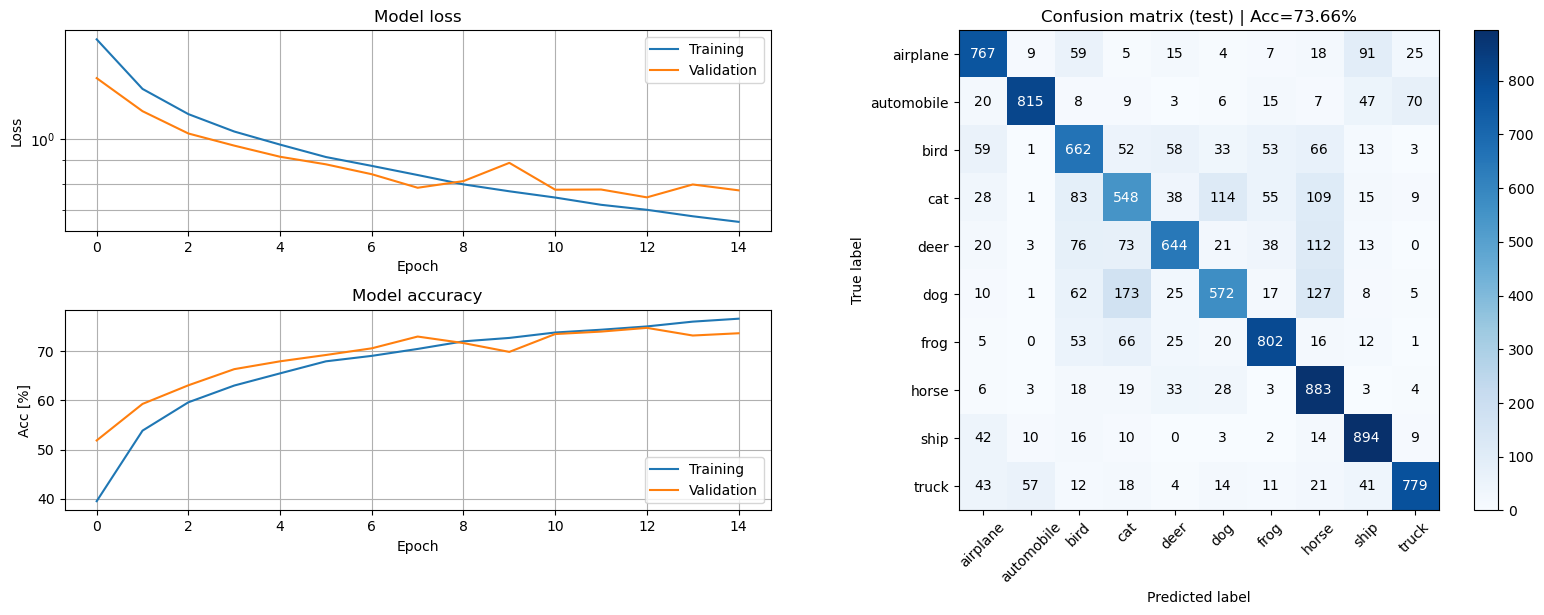

In [31]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 6:</span>**
Compare this model and the previous in terms of the training accuracy, validation accuracy, and test accuracy. Explain the similarities and differences (remember that the only difference between the models should be the addition of Dropout layers).

Hint: what does the dropout layer do at test time?

#### **<span style="color:green">Answer:</span>**
The model that incorporates Dropout layers has not only a better test accuracy by about 4%, but also does not show the same overtraining effects as previously. The training and validation accuracies on the last epoch were 77% and 74%, respectively. The difference between these and and test accuracy is very small, compared to the 27% gap between the test and training accuracy on the model without Dropout. The Dropout layers are only used during training, so at test time we're still using the strength of the full model which gives us a good accuracy. 

#### **4.2 Batch normalization**
The final layer we will explore is ```BatchNormalization```. As the name suggests, this layer normalizes the data in each batch to have a specific mean and standard deviation, which is learned during training. The reason for this is quite complicated (and still debated among the experts), but suffice to say that it helps the optimization converge faster which means we get higher performance in fewer epochs. The normalization is done separatly for each feature, i.e. the statistics are calculated accross the batch dimension of the input data. The equations for batch-normalizing one feature are the following, where $N$ is the batch size, $x$ the input features, and $y$ the normalized output features:

$$ \mu = \frac{1}{N} \sum_{i=0}^{N}x_i,\;\;\;\; \sigma^2 = \frac{1}{N} \sum_{i=0}^{N}(x_i - \mu)^2 $$

$$ \hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}} $$

$$ y_i = \gamma \hat{x}_i + \beta $$

At first glance this might look intimidating, but all it means is that we begin by scaling and shifting the data to have mean $\mu=0$ and standard deviation $\sigma=1$. After this we use the learnable parameters $\gamma$ and $\beta$ to decide the width and center of the final distribution. $\epsilon$ is a small constant value that prevents the denominator from being zero.

In addition to learning the parameters $\gamma$ and $\beta$ by gradient decent just like the weights, Batch Normalization also keeps track of the running average of minibatch statistics $\mu$ and $\sigma$. These averages are used to normalize the test data. We can tune the rate at which the running averages are updated with the *momentum* parameter of the BatchNormalization layer. A large momentum means that the statistics converge more slowly and therefore requires more updates before it represents the data. A low momentum, on the other hand, adapts to the data more quickly but might lead to unstable behaviour if the latest minibatches are not representative of the whole dataset. For this test we recommend a momentum of 0.75, but you probably want to change this when you design a larger network in Section 5.

The batch normalization layer should be added after the hidden layer linear transformation, but before the nonlinear activation. This means that we cannot specify the activation funciton in the ```Conv2D``` or ```Dense``` if we want to batch-normalize the output. We therefore need to use the ```Activation``` layer to add a separate activation to the network stack after batch normalization. For example, the convolution block will now look like **[conv - batchnorm - activation - pooling]**.

Extend your previous model with batch normalization, both in the convolution and fully connected part of the model.

In [34]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
x = x_in

x = Conv2D(filters = 32, kernel_size = 3, input_shape=x_in.shape[1:])(x)
x = BatchNormalization(momentum=0.5)(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=2, padding="same")(x)
x = Dropout(0.2)(x)

x = Conv2D(filters = 64, kernel_size = 3, input_shape=x_in.shape[1:])(x)
x = BatchNormalization(momentum=0.5)(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size = 2, padding="same")(x)
x = Dropout(0.2)(x)

x = Conv2D(filters = 128, kernel_size = 3, input_shape=x_in.shape[1:])(x)
x = BatchNormalization(momentum=0.5)(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size = 2, padding="same")(x)
x = Dropout(0.2)(x)

# Output layer
x = Flatten()(x)
x = Dense(256)(x)
x = BatchNormalization(momentum=0.5)(x)
x = Activation("tanh")(x)
x = Dense(128)(x)
x = BatchNormalization(momentum=0.5)(x)
x = Activation("tanh")(x)
x = Dense(10, activation = "softmax")(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_10"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_13 (InputLayer)                        [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_31 (Conv2D)                           (None, 30, 30, 32)                      896            
____________________________________________________________________________________________________
batch_normalization_1 (BatchNormalization)   (None, 30, 30, 32)                      128            
____________________________________________________________________________________________________
activation (Activation)                      (None, 30, 30, 32)                      0              
_________________________________________________________________________

In [35]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 20s 14ms/step - loss: 1.6293 - accuracy: 0.4105 - val_loss: 1.1441 - val_accuracy: 0.5935
Epoch 2/15
1250/1250 [==============================] - 17s 13ms/step - loss: 1.1518 - accuracy: 0.5923 - val_loss: 0.9866 - val_accuracy: 0.6568
Epoch 3/15
1250/1250 [==============================] - 16s 13ms/step - loss: 1.0190 - accuracy: 0.6413 - val_loss: 0.9395 - val_accuracy: 0.6666
Epoch 4/15
1250/1250 [==============================] - 16s 13ms/step - loss: 0.9217 - accuracy: 0.6763 - val_loss: 0.7985 - val_accuracy: 0.7225
Epoch 5/15
1250/1250 [==============================] - 16s 13ms/step - loss: 0.8707 - accuracy: 0.6947 - val_loss: 0.7624 - val_accuracy: 0.7380
Epoch 6/15
1250/1250 [==============================] - 16s 13ms/step - loss: 0.8151 - accuracy: 0.7148 - val_loss: 0.8156 - val_accuracy: 0.7214
Epoch 7/15
1250/1250 [==============================] - 16s 13ms/step - loss: 0.7713 - accuracy: 0.7305 - val_loss: 0.7214 -

In [36]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.663
Test accuracy = 0.773


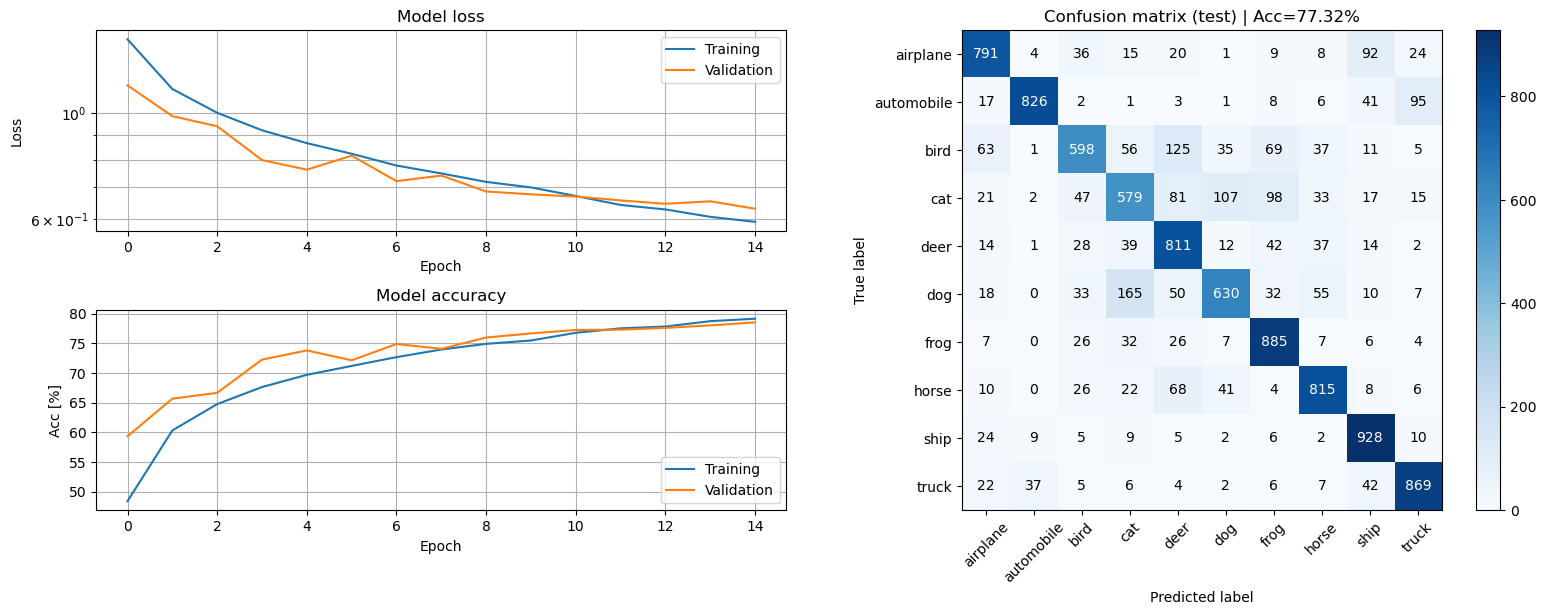

In [37]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 7:</span>**
When using BatchNorm one must take care to select a good minibatch size. Describe what problems might arise if:

1. The minibatch size is too small.
2. The minibatch size is too large.

You can reason about this given the description of BatchNorm above, or you can search for the information in other sources. Do not forget to provide links to the sources if you do!

#### **<span style="color:green">Answer:</span>**
According to [this website](https://www.pinecone.io/learn/batch-layer-normalization/), if the minibatch size is too small, each batch will not be representative of the entire distribution, so the BatchNorm parameters won't converge to anything meaningful, at least not with increased speed. 
In general, a larger batch size is better, but a too large batch size might lead to "overtrained" parameters for the BatchNormalization, because they're being learnt very specific to the training data.

### **5. Putting it all together**
We now want you to create your own model based on what you have learned. We want you to experiment and see what works and what doesn't, so don't go crazy with the number of epochs until you think you have something that works.

To pass this assignment, we want you to acheive **75%** accuracy on the test data in no more than **25 epochs**. This is possible using the layers and techniques we have explored in this notebook, but you are free to use any other methods that we didn't cover. (You are obviously not allowed to cheat, for example by training on the test data.)

Model: "model_12"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_15 (InputLayer)                        [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_37 (Conv2D)                           (None, 30, 30, 32)                      896            
____________________________________________________________________________________________________
batch_normalization_11 (BatchNormalization)  (None, 30, 30, 32)                      128            
____________________________________________________________________________________________________
activation_10 (Activation)                   (None, 30, 30, 32)                      0              
_________________________________________________________________________

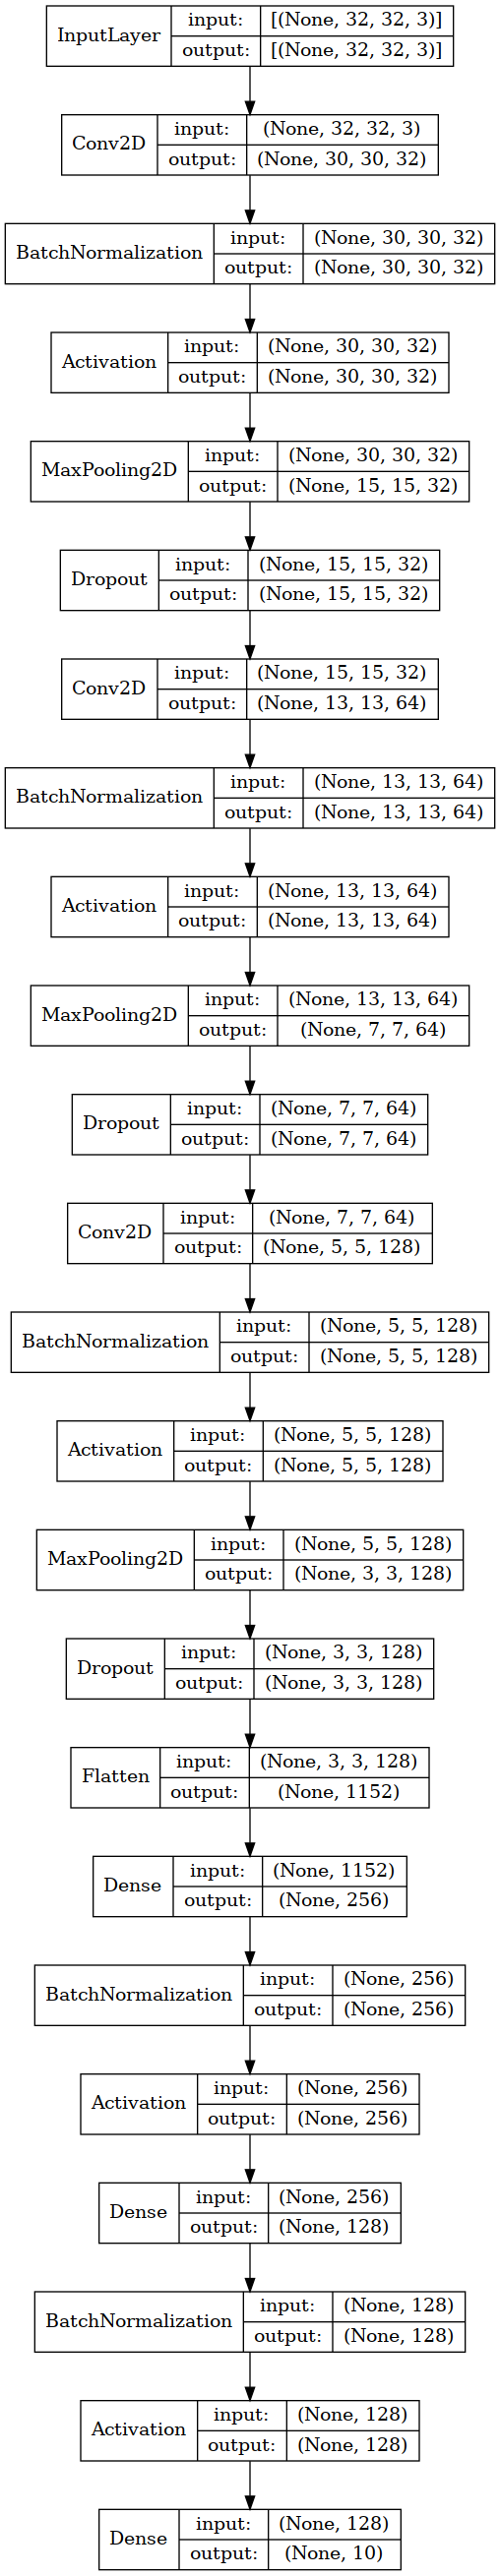

In [39]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import plot_model

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
x = x_in

x = Conv2D(filters = 32, kernel_size = 3, input_shape=x_in.shape[1:])(x)
x = BatchNormalization(momentum=0.5)(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size=2, padding="same")(x)
x = Dropout(0.2)(x)

x = Conv2D(filters = 64, kernel_size = 3, input_shape=x_in.shape[1:])(x)
x = BatchNormalization(momentum=0.5)(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size = 2, padding="same")(x)
x = Dropout(0.2)(x)

x = Conv2D(filters = 128, kernel_size = 3, input_shape=x_in.shape[1:])(x)
x = BatchNormalization(momentum=0.5)(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size = 2, padding="same")(x)
x = Dropout(0.2)(x)

# Output layer
x = Flatten()(x)
x = Dense(256)(x)
x = BatchNormalization(momentum=0.5)(x)
x = Activation("tanh")(x)
x = Dense(128)(x)
x = BatchNormalization(momentum=0.5)(x)
x = Activation("tanh")(x)
x = Dense(10, activation = "softmax")(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

In [43]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 17s 14ms/step - loss: 0.5817 - accuracy: 0.7966 - val_loss: 0.6479 - val_accuracy: 0.7808
Epoch 2/25
1250/1250 [==============================] - 17s 13ms/step - loss: 0.5567 - accuracy: 0.8046 - val_loss: 0.6287 - val_accuracy: 0.7854
Epoch 3/25
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5536 - accuracy: 0.8051 - val_loss: 0.6249 - val_accuracy: 0.7875
Epoch 4/25
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5355 - accuracy: 0.8128 - val_loss: 0.6788 - val_accuracy: 0.7715
Epoch 5/25
1250/1250 [==============================] - 17s 13ms/step - loss: 0.5289 - accuracy: 0.8134 - val_loss: 0.6351 - val_accuracy: 0.7821
Epoch 6/25
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5121 - accuracy: 0.8189 - val_loss: 0.6639 - val_accuracy: 0.7757
Epoch 7/25
1250/1250 [==============================] - 16s 13ms/step - loss: 0.5016 - accuracy: 0.8240 - val_loss: 0.6112 -

In [44]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.699
Test accuracy = 0.785


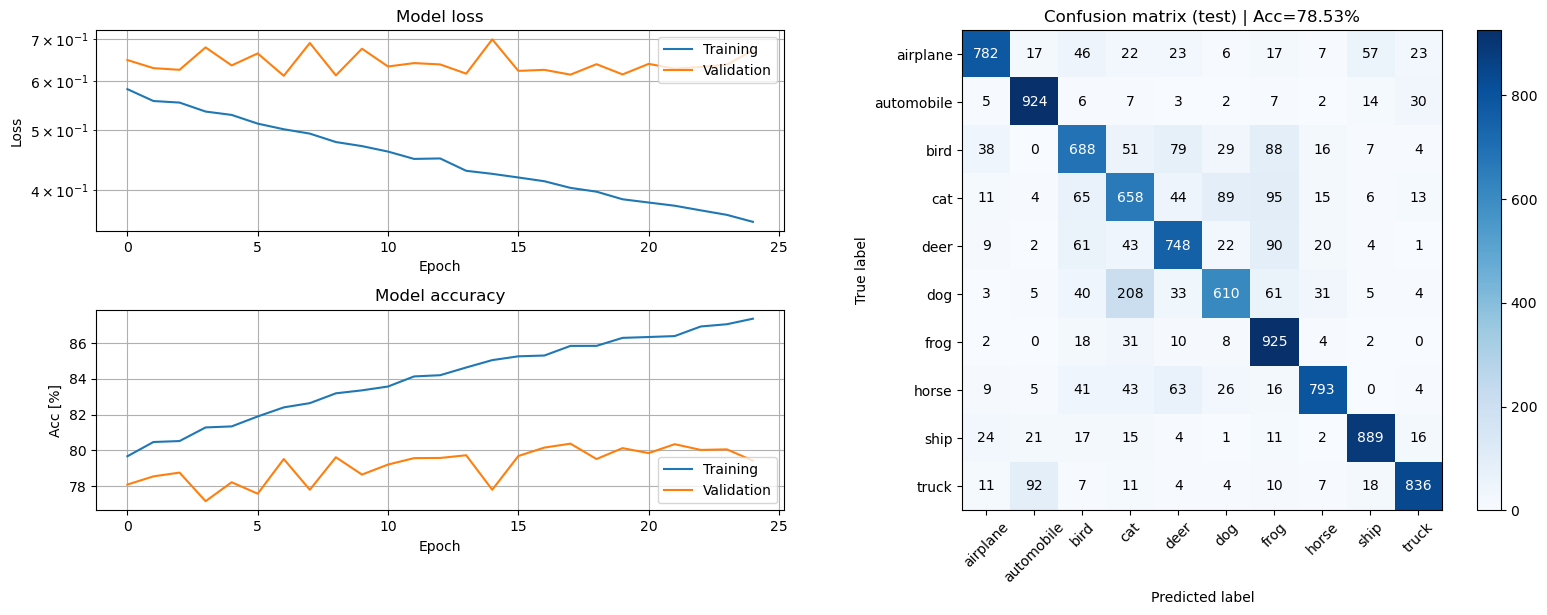

In [45]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 8:</span>**
Design and train a model that achieves at least 75% test accuracy in at most 25 epochs. Explain your model architecture and motivate the design choices you have made.

#### **<span style="color:green">Answer:</span>**
For this last question, we didn't have to change anything to our model from the previous questions as we already achieved the level of accuracy by adding the Dropout and BatchNorm layers. We have three convolutional blocks with increasing filter sizes. In each of these blocks we have a BatchNorm and a Dropout layer to reduce overfitting and improve converge speeds. After the convolutional blocks, we flatten the data and move onto classification with three dense layers, each of which also applies BatchNorm. We achieved 77% accuracy already after 15 epochs, but ran it for longer to see if it would increase further without overtraining. We then reached 78% test accuracy, but overtrained a bit as our training accuracy was 87%. It would have been better to implement early stopping in this case and take the model at 15 epochs.

---

### **Want some extra challenge?**
For those of you that want to get creative, here are some things to look into. But note that we don't have the answers here. Any of these might improve the performance, or might not, or it might only work in combination with each other. This is up to you to figure out. This is how deep learning research often happens, trying things in a smart way to see what works best.
* Tweak or change the optimizer or training parameters.
* Tweak the filter parameters, such as numbers and sizes of filters.
* Use other activation functions.
* Add L1/L2 regularization (see https://www.tensorflow.org/api_docs/python/tf/keras/regularizers)
* Include layers that we did not cover here (see https://www.tensorflow.org/api_docs/python/tf/keras/layers). For example, our best model uses the global pooling layers.
* Take inspiration from some well-known architectures, such as ResNet or VGG16. (But don't just copy-paste those architectures. For one, what's the fun in that? Also, they take a long time to train, you will not have time.)
* Use explicit model ensembing (training multiple models that vote on or average the outputs - this will also take a lot of time.)
* Use data augmentation to create a larger training set (see https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [ ]:

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

x_in = Input(shape=X_train.shape[1:])

x = ???

model = Model(inputs=x_in, outputs=x)

# You can also change this if you want
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

# Print the summary and model image
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

# ============================================


In [ ]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=5, verbose=1, validation_split=0.2)

In [ ]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)